In [1]:
#packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import tree
from ipykernel import kernelapp as app
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams


In [4]:
#loading the csv
df=pd.read_csv("apy.csv",encoding = "ISO-8859-1")
df.head(10)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.0,100
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2
8,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,5.0,15
9,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,40.0,169


In [5]:
#checking the datatypes
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production        object
dtype: object

In [6]:
#indian agricultural production dataset
df.head(5)
df.shape

(246091, 7)

In [7]:
#here production is of type object --hence converted to numeric type

In [8]:
df.State_Name.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [9]:
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [10]:
#converting production to numeric type
df['Production']=pd.to_numeric(df['Production'],errors='coerce')

In [11]:
#checking the datatypes
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [13]:
#grouping area and production for each year by average
data=df.groupby(['Crop_Year'])['Area','Production'].mean()
data=data.reset_index(level=0, inplace=False)
data
data1=data
data1

<ipython-input-13-71d5e793b5bc>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data=df.groupby(['Crop_Year'])['Area','Production'].mean()


,Crop_Year,Area,Production
0,1997,26038.324081,9.565489e+04
1,1998,14479.153906,5.172545e+05
2,1999,12678.074790,5.172145e+05
3,2000,12102.612169,5.496723e+05
4,2001,12371.499489,5.616144e+05
5,2002,9463.680476,4.654666e+05
6,2003,9954.769395,4.619857e+05
7,2004,11891.933465,5.909555e+05
8,2005,11822.333236,5.949085e+05
9,2006,11913.672644,6.211571e+05


In [14]:
#calulation cpi(crop production index)
#cpi=production/area
data1['CPI']=data1['Production']/data1['Area']
data1

,Crop_Year,Area,Production,CPI
0,1997,26038.324081,9.565489e+04,3.673619
1,1998,14479.153906,5.172545e+05,35.724086
2,1999,12678.074790,5.172145e+05,40.795984
3,2000,12102.612169,5.496723e+05,45.417661
4,2001,12371.499489,5.616144e+05,45.395827
5,2002,9463.680476,4.654666e+05,49.184519
6,2003,9954.769395,4.619857e+05,46.408482
7,2004,11891.933465,5.909555e+05,49.693814
8,2005,11822.333236,5.949085e+05,50.320732
9,2006,11913.672644,6.211571e+05,52.138173


In [15]:
#calulation cpi(crop production index)
#cpi=production/area
data['CPI']=data['Production']/data['Area']
data.head()

,Crop_Year,Area,Production,CPI
0,1997,26038.324081,95654.894483,3.673619
1,1998,14479.153906,517254.540970,35.724086
2,1999,12678.074790,517214.531396,40.795984
3,2000,12102.612169,549672.332849,45.417661
4,2001,12371.499489,561614.446722,45.395827


In [16]:
#details about mean,std deviation,min,maxetc
data.describe()

,Crop_Year,Area,Production,CPI
count,19.000000,19.000000,1.900000e+01,19.000000
mean,2006.000000,12141.402985,5.496053e+05,48.098207
std,5.627314,3633.397954,2.364676e+05,22.993961
min,1997.000000,8187.362989,1.236197e+04,1.509884
25%,2001.500000,10531.577629,4.737958e+05,43.095905
50%,2006.000000,11768.527148,5.496723e+05,46.408482
75%,2010.500000,12237.055829,6.073395e+05,51.229452
max,2015.000000,26038.324081,1.037554e+06,95.030260


<AxesSubplot:xlabel='CPI'>

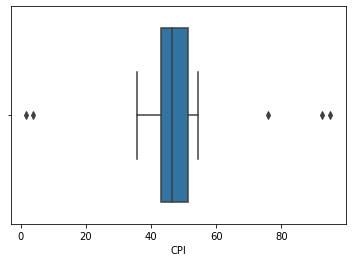

In [17]:
#boxplot plotting to remove the outliers
import seaborn as sns

sns.boxplot(x=data['CPI'])

In [18]:
#the range is from 43 to 51--rest of the data are considered are outliers
data = data[np.isfinite(data['CPI'])]
data=data[data.CPI >43]
data=data[data.CPI <51]
data.set_index('Crop_Year')
data

,Crop_Year,Area,Production,CPI
3,2000,12102.612169,549672.332849,45.417661
4,2001,12371.499489,561614.446722,45.395827
5,2002,9463.680476,465466.567649,49.184519
6,2003,9954.769395,461985.734566,46.408482
7,2004,11891.933465,590955.527122,49.693814
8,2005,11822.333236,594908.463112,50.320732
10,2007,10513.848637,482125.050009,45.856191
11,2008,11768.527148,542306.282654,46.081067
12,2009,11738.077997,556438.877374,47.404599


array([[<AxesSubplot:title={'center':'Crop_Year'}>,
        <AxesSubplot:title={'center':'Area'}>],
       [<AxesSubplot:title={'center':'Production'}>,
        <AxesSubplot:title={'center':'CPI'}>]], dtype=object)

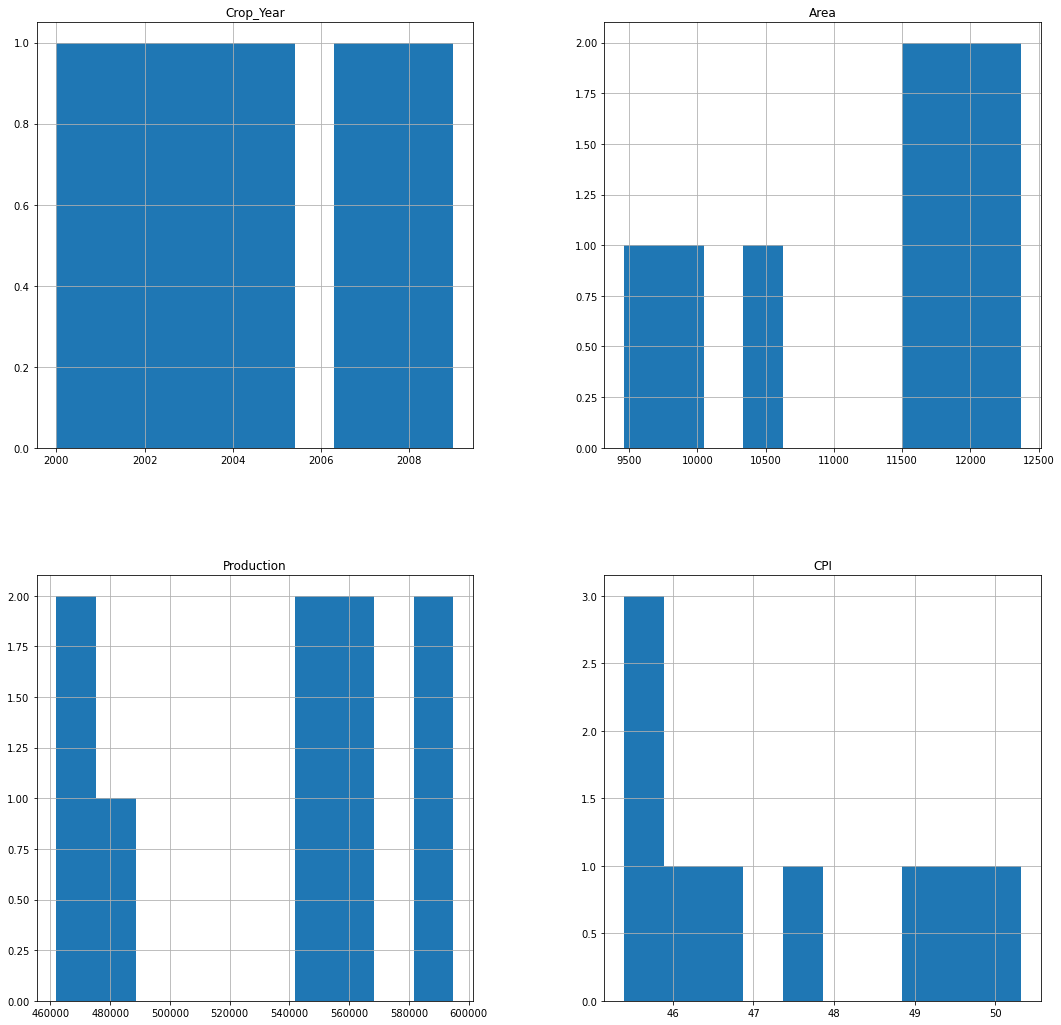

In [19]:
#plotting histogram
data.hist(figsize=(18,18))

<ipython-input-20-b080e024bd68>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


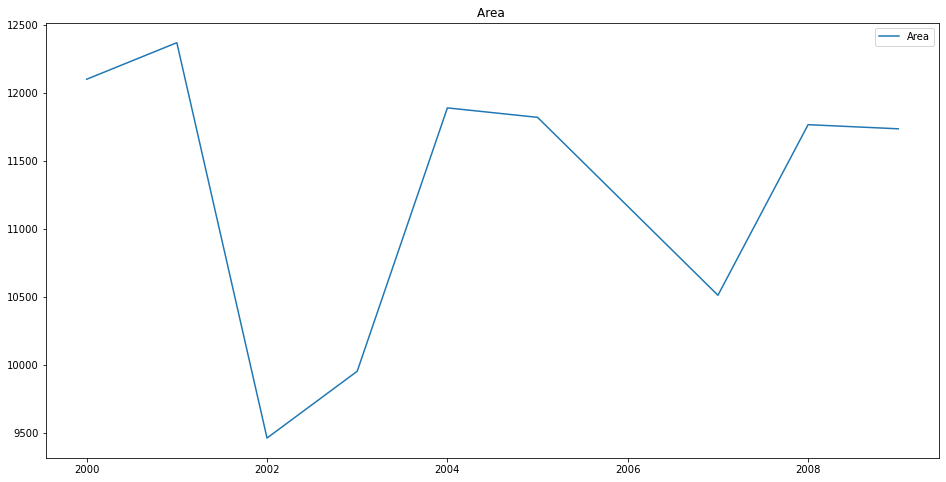

In [20]:
#analysis of variation in area
x_axis=data.Crop_Year
y_axis=data.Area

y1_axis=data.Production
fig = plt.figure(figsize=(16,8))
plt.plot(x_axis,y_axis)
ax = fig.add_subplot(111)
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
plt.title("Area ")
plt.legend(["Area"])
plt.show()

<ipython-input-21-78b7f42f1870>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


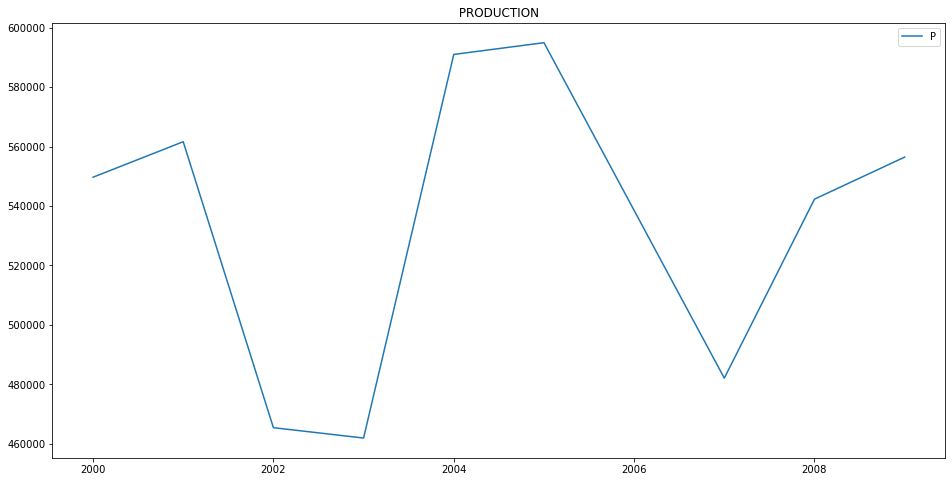

In [21]:
#analysis of variations in production
x_axis=data.Crop_Year


y1_axis=data.Production



fig = plt.figure(figsize=(16,8))
plt.plot(x_axis,y1_axis)
ax = fig.add_subplot(111)
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
plt.title(" PRODUCTION ")
plt.legend("PRODUCTION")
plt.show()

In [22]:
#importing random forest regressor
from sklearn.ensemble import RandomForestRegressor


In [23]:
#splitting to test train
from sklearn.model_selection import train_test_split

In [24]:
#splitting and fitting of the model
x=data.iloc[:,0:1].values
y=data.iloc[:,3].values
regressor=RandomForestRegressor(n_estimators=8,random_state=0,n_jobs=1,verbose=35)

regressor.fit(x,y)   

building tree 1 of 8
building tree 2 of 8
building tree 3 of 8
building tree 4 of 8
building tree 5 of 8
building tree 6 of 8
building tree 7 of 8
building tree 8 of 8


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


RandomForestRegressor(n_estimators=8, n_jobs=1, random_state=0, verbose=35)

In [25]:
#predicting for the test values
y_pred=regressor.predict(x)
y_pred

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


array([45.41220218, 45.40128519, 47.4167545 , 47.102491  , 48.4618143 ,
       49.18593993, 46.52669636, 46.24650807, 46.74283264])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


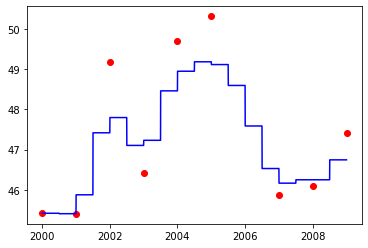

In [26]:
x_grid=np.arange(min(x),max(x),0.001)
x_grid=x_grid.reshape(len(x_grid),1)
plt.scatter(x,y,color='r')
plt.plot(x_grid,regressor.predict(x_grid),color='b')
a=plt.show()
a

<ipython-input-27-17bcb317e842>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


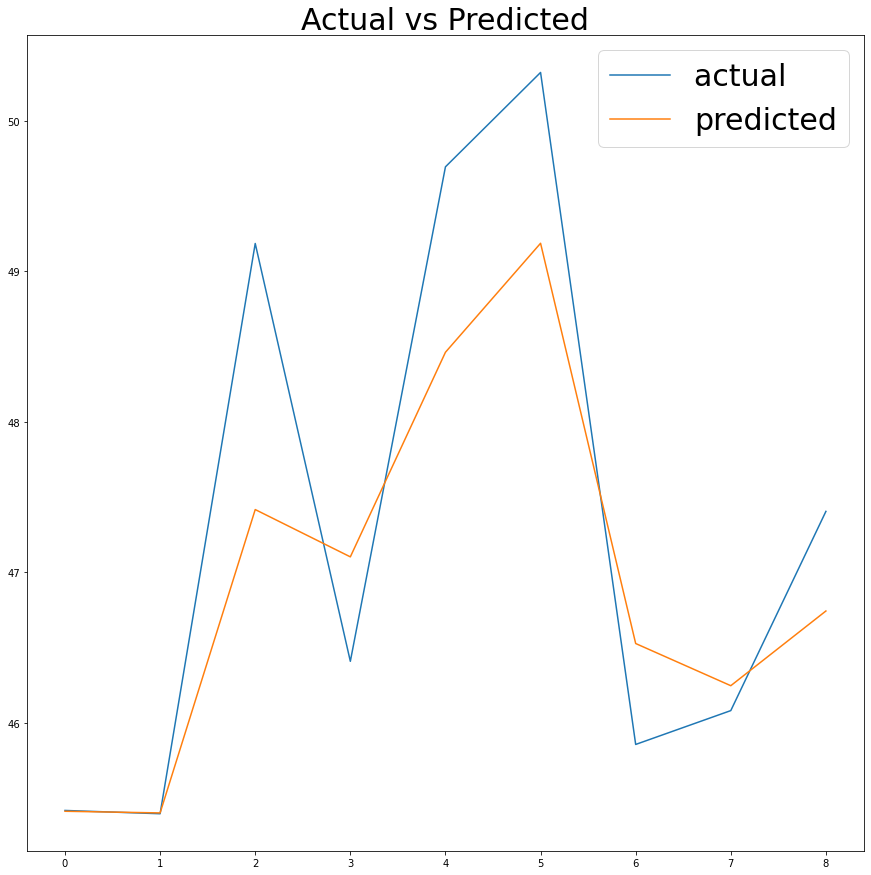

In [27]:
#actual and predicted values
dm = pd.DataFrame({'Actual': y, 'Predicted': y_pred}).reset_index()
x_axis=dm.index
y_axis=dm.Actual
y1_axis=dm.Predicted


fig = plt.figure(figsize=(15,15))

plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted")
ax = fig.add_subplot(111)
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
plt.legend(["actual ","predicted"],fontsize=30)
b=plt.show()
b

In [28]:
#calculation of mse
from sklearn.metrics import mean_squared_error
print('mse:%.2f'%mean_squared_error(y,y_pred))

mse:0.81


In [29]:
#here error is 10% -optimization is done 

In [30]:
#splitting and fitting of the model
x=data.iloc[:,0:1].values
y=data.iloc[:,3].values
regressor=RandomForestRegressor(n_estimators=12,random_state=0,n_jobs=1,verbose=13)

regressor.fit(x,y)

building tree 1 of 12
building tree 2 of 12
building tree 3 of 12
building tree 4 of 12
building tree 5 of 12
building tree 6 of 12
building tree 7 of 12
building tree 8 of 12
building tree 9 of 12
building tree 10 of 12
building tree 11 of 12
building tree 12 of 12


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

RandomForestRegressor(n_estimators=12, n_jobs=1, random_state=0, verbose=13)

In [31]:
#predicting for the test values
y_pred=regressor.predict(x)
y_pred

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

array([45.726107  , 45.71519001, 48.00600917, 47.33382739, 48.92472398,
       49.51196079, 46.71271891, 46.54466636, 47.0961381 ])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

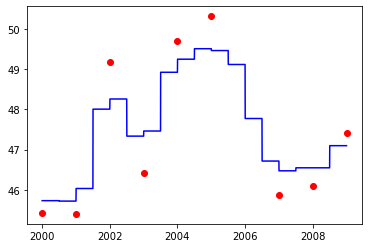

In [32]:
#random forest steps plotting
x_grid=np.arange(min(x),max(x),0.001)
x_grid=x_grid.reshape(len(x_grid),1)
plt.scatter(x,y,color='r')
plt.plot(x_grid,regressor.predict(x_grid),color='b')
a=plt.show()
a

<ipython-input-33-17bcb317e842>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


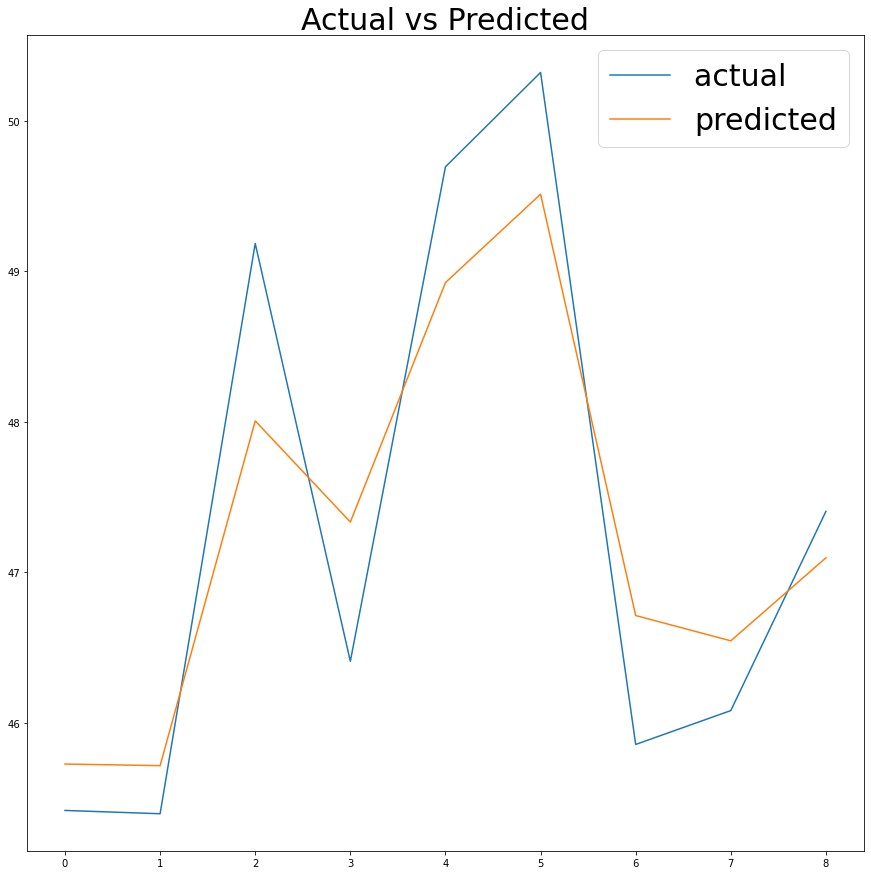

In [33]:
#actual and predicted values
dm = pd.DataFrame({'Actual': y, 'Predicted': y_pred}).reset_index()
x_axis=dm.index
y_axis=dm.Actual
y1_axis=dm.Predicted


fig = plt.figure(figsize=(15,15))

plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted")
ax = fig.add_subplot(111)
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
plt.legend(["actual ","predicted"],fontsize=30)
b=plt.show()
b

In [34]:
#calculation of mse
from sklearn.metrics import mean_squared_error
print('mse:%.2f'%mean_squared_error(y,y_pred))

mse:0.53


In [35]:
#-------------------------------------------------------------------------------------------------------------------

In [36]:
#the range is from 43 to 51--rest of the data are considered are outliers
data1 = data1[np.isfinite(data1['CPI'])]


data1.set_index('Crop_Year')
data1=data1[['Crop_Year','CPI']]
data1

,Crop_Year,CPI
0,1997,3.673619
1,1998,35.724086
2,1999,40.795984
3,2000,45.417661
4,2001,45.395827
5,2002,49.184519
6,2003,46.408482
7,2004,49.693814
8,2005,50.320732
9,2006,52.138173


In [37]:
newx=[[2016]]

In [38]:
pred_new=regressor.predict(newx)
pred_new

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

array([47.0961381])

In [39]:
year_2016=2016
pred_new=47.0961381

In [40]:
df2=data1.append(pd.DataFrame([[year_2016,pred_new]],columns=data1.columns))


In [41]:
df2

,Crop_Year,CPI
0,1997,3.673619
1,1998,35.724086
2,1999,40.795984
3,2000,45.417661
4,2001,45.395827
5,2002,49.184519
6,2003,46.408482
7,2004,49.693814
8,2005,50.320732
9,2006,52.138173


In [42]:
#splitting and fitting of the model
x=df2.iloc[:,0:1].values
y=df2.iloc[:,1].values
regressor=RandomForestRegressor(n_estimators=12,random_state=0,n_jobs=1,verbose=13)

regressor.fit(x,y)

building tree 1 of 12
building tree 2 of 12
building tree 3 of 12
building tree 4 of 12
building tree 5 of 12
building tree 6 of 12
building tree 7 of 12
building tree 8 of 12
building tree 9 of 12
building tree 10 of 12
building tree 11 of 12
building tree 12 of 12


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

RandomForestRegressor(n_estimators=12, n_jobs=1, random_state=0, verbose=13)

In [43]:
year_2017=[[2017]]
y_pred=regressor.predict(year_2017)
y_pred

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

array([38.07667798])

In [44]:
y_pred=38.07667798
year_2017=2017

In [45]:
df2=df2.append(pd.DataFrame([[year_2017,y_pred]],columns=data1.columns))
df2

,Crop_Year,CPI
0,1997,3.673619
1,1998,35.724086
2,1999,40.795984
3,2000,45.417661
4,2001,45.395827
5,2002,49.184519
6,2003,46.408482
7,2004,49.693814
8,2005,50.320732
9,2006,52.138173


In [46]:
#splitting and fitting of the model
x=df2.iloc[:,0:1].values
y=df2.iloc[:,1].values
regressor=RandomForestRegressor(n_estimators=12,random_state=0,n_jobs=1,verbose=13)

regressor.fit(x,y)
year_2017=[[2018]]
y_pred=regressor.predict(year_2017)
y_pred

building tree 1 of 12
building tree 2 of 12
building tree 3 of 12
building tree 4 of 12
building tree 5 of 12
building tree 6 of 12
building tree 7 of 12
building tree 8 of 12
building tree 9 of 12
building tree 10 of 12
building tree 11 of 12
building tree 12 of 12


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

array([34.98869904])

In [47]:
y_pred=34.98869904
year_2018=2018
df2=df2.append(pd.DataFrame([[year_2018,y_pred]],columns=data1.columns))
df2

,Crop_Year,CPI
0,1997,3.673619
1,1998,35.724086
2,1999,40.795984
3,2000,45.417661
4,2001,45.395827
5,2002,49.184519
6,2003,46.408482
7,2004,49.693814
8,2005,50.320732
9,2006,52.138173


In [48]:
#splitting and fitting of the model
x=df2.iloc[:,0:1].values
y=df2.iloc[:,1].values
regressor=RandomForestRegressor(n_estimators=12,random_state=0,n_jobs=1,verbose=13)

regressor.fit(x,y)
year_2019=[[2019]]
y_pred=regressor.predict(year_2017)
y_pred

building tree 1 of 12
building tree 2 of 12
building tree 3 of 12
building tree 4 of 12
building tree 5 of 12
building tree 6 of 12
building tree 7 of 12
building tree 8 of 12
building tree 9 of 12
building tree 10 of 12
building tree 11 of 12
building tree 12 of 12


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

array([32.71346095])

In [49]:
y_pred=32.71346095
year_2019=2019
df2=df2.append(pd.DataFrame([[year_2019,y_pred]],columns=data1.columns))
df2

,Crop_Year,CPI
0,1997,3.673619
1,1998,35.724086
2,1999,40.795984
3,2000,45.417661
4,2001,45.395827
5,2002,49.184519
6,2003,46.408482
7,2004,49.693814
8,2005,50.320732
9,2006,52.138173
